In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def train_val_datasets():
    """Creates datasets for training and validation.

    Returns:
        (tf.data.Dataset, tf.data.Dataset): Training and validation datasets.
    """

    training_dataset, validation_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=os.getcwd(),
        image_size=(128,128),
        batch_size=16,
        label_mode="binary",
        validation_split=0.15,
        subset="both",
        seed=42
    )

    return training_dataset, validation_dataset

In [3]:
training_dataset, validation_dataset = train_val_datasets()

Found 1968 files belonging to 2 classes.
Using 1673 files for training.
Using 295 files for validation.


In [4]:
# Set the weights file you downloaded into a variable
local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = tf.keras.applications.inception_v3.InceptionV3(
    input_shape = (128, 128, 3),
    include_top = False,
    weights = None)

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
    layer.trainable = False

In [5]:
# Choose `mixed7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 6, 6, 768)


In [6]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)  
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)  

# Append the dense network to the base model
model = tf.keras.Model(pre_trained_model.input, x)

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 63, 63,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 63, 63,    │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 63, 63,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 61, 61,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 61,    │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 61, 61,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 61, 61,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 61,    │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 61, 61,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 30, 30,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 30, 30,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 30,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 30, 30,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 28, 28,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 28, 28,    │          0 │ batch_normalizat

 Total params: 23,263,137 (88.74 MB)

 Trainable params: 14,287,873 (54.50 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

In [7]:
# Define the preprocess function
def preprocess(image, label):
    image = tf.keras.applications.inception_v3.preprocess_input(image)
    return image, label

# Apply the preprocessing to the datasets
train_dataset_scaled = training_dataset.map(preprocess)
validation_dataset_scaled = validation_dataset.map(preprocess)

In [8]:
# Optimize the datasets for training
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (train_dataset_scaled
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                       )

validation_dataset_final = (validation_dataset_scaled
                            .cache()
                            .prefetch(PREFETCH_BUFFER_SIZE)
                            )

In [9]:
# Create a model with data augmentation layers
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomTranslation(0.2,0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomZoom(0.2),
    ])

In [10]:
# Attach the data augmentation model to the base model
inputs = tf.keras.Input(shape=(128, 128, 3))
x = data_augmentation(inputs)
x = model(x)

model_with_aug = tf.keras.Model(inputs, x)

In [11]:
# Set the training parameters
model_with_aug.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

In [12]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
        if logs["accuracy"] >= 0.92 and logs["val_accuracy"] >= 0.9:
            self.model.stop_training = True

            print("\nReached 92% train accuracy and 90% validation accuracy, so cancelling training!")

In [13]:
# fit the model
history = model_with_aug.fit(
    train_dataset_final,
    validation_data = validation_dataset_final,
    epochs = 10,
    verbose = 1,
    callbacks = [EarlyStoppingCallback()],
)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 22s 116ms/step - accuracy: 0.5418 - loss: 2.3741 - val_accuracy: 0.4441 - val_loss: 0.7297
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.5884 - loss: 0.7194 - val_accuracy: 0.4542 - val_loss: 0.7634
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - accuracy: 0.5897 - loss: 0.6966 - val_accuracy: 0.5661 - val_loss: 0.8053
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step - accuracy: 0.5924 - loss: 0.6952 - val_accuracy: 0.5864 - val_loss: 0.8757
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 15s 138ms/step - accuracy: 0.6172 - loss: 0.6887 - val_accuracy: 0.5492 - val_loss: 0.8038
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 26s 244ms/step - accuracy: 0.6115 - loss: 0.6837 - val_accuracy: 0.5153 - val_loss: 0.7050
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 31s 292ms/step - accuracy: 0.5939 - loss: 0.6806 - val_accuracy: 0.5898 - val_loss: 0.7806
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 37s 346ms/step - accuracy: 0.6350 - loss: 0

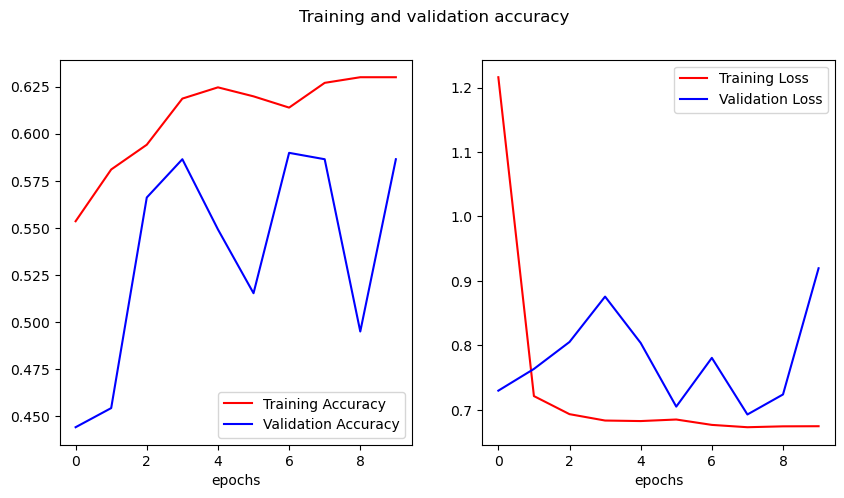

In [14]:
# Get training summary validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()